In [1]:
#import pandas, matplotlib, and numpy

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os

In [2]:
# read the housing_data_claen.csv file into a dataframe
df = pd.read_csv('housing_data_clean.csv')
print(df)

                    APN  Address - Street Number Address - Street Name  \
0     236-0243-003-0000                     6248           Saint James   
1     292-0500-070-0000                     1057            Harrington   
2     260-0410-014-0000                     3930                 Cyrus   
3     283-0151-025-0000                     2124        Gunn (Priv Ln)   
4     273-0112-028-0000                     3005    California-priv.Ln   
...                 ...                      ...                   ...   
7850  272-0260-008-0000                     2640              CARDINAL   
7851  230-0424-001-0000                     4907              Marietta   
7852  256-0284-033-0000                     4755               Gibbons   
7853  273-0122-033-0000                     6310              Eastmont   
7854  230-0402-005-0000                     4139                Pueblo   

      Address - Zip Code  Bedrooms  Bathrooms  MTRO Square Footage  \
0                  95608         4       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7855 entries, 0 to 7854
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      7855 non-null   object 
 1   Address - Street Number  7855 non-null   int64  
 2   Address - Street Name    7855 non-null   object 
 3   Address - Zip Code       7855 non-null   int64  
 4   Bedrooms                 7855 non-null   int64  
 5   Bathrooms                7855 non-null   int64  
 6   MTRO Square Footage      7855 non-null   int64  
 7   Lot Size - Acres         7855 non-null   float64
 8   Year Built               7855 non-null   int64  
 9   DOM                      7855 non-null   int64  
 10  CDOM                     7855 non-null   int64  
 11  Original Price           7855 non-null   int64  
 12  List Price               7855 non-null   int64  
 13  Close Price              7855 non-null   int64  
 14  Close Date              

In [4]:
#Convert Close Date column to date type and Zip Code column to category type.
df['Close Date'] = pd.to_datetime(df['Close Date'], format='%Y-%m-%d')
df['Address - Zip Code'] = df['Address - Zip Code'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7855 entries, 0 to 7854
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   APN                      7855 non-null   object        
 1   Address - Street Number  7855 non-null   int64         
 2   Address - Street Name    7855 non-null   object        
 3   Address - Zip Code       7855 non-null   category      
 4   Bedrooms                 7855 non-null   int64         
 5   Bathrooms                7855 non-null   int64         
 6   MTRO Square Footage      7855 non-null   int64         
 7   Lot Size - Acres         7855 non-null   float64       
 8   Year Built               7855 non-null   int64         
 9   DOM                      7855 non-null   int64         
 10  CDOM                     7855 non-null   int64         
 11  Original Price           7855 non-null   int64         
 12  List Price               7855 non-

In [5]:
df.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
0,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08,9.0
1,292-0500-070-0000,1057,Harrington,95608,3,2,1832,0.21,1984,0,10,285000,285000,278000,2000-05-08,9.0
2,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05,9.5
3,283-0151-025-0000,2124,Gunn (Priv Ln),95608,4,2,1994,0.17,1991,0,80,229000,219900,217000,2000-07-05,9.5
4,273-0112-028-0000,3005,California-priv.Ln,95608,3,2,1451,0.23,1980,0,46,182500,179000,174000,2000-07-05,9.5


In [6]:
df.describe()

,Address - Street Number,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,DPRIME
count,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7.855000e+03,7.855000e+03,7.855000e+03,7855.000000
mean,4625.409293,3.339147,2.229026,1733.003947,0.222191,1971.235010,29.622661,46.744239,3.737940e+05,3.609074e+05,3.587186e+05,4.598536
std,1448.345923,0.588762,0.601647,506.205385,0.027400,181.733921,46.731520,67.992814,4.324273e+05,1.510391e+05,1.513983e+05,1.750595
min,0.000000,2.000000,1.000000,600.000000,0.170000,1920.000000,0.000000,0.000000,5.490000e+02,5.990000e+04,1.850000e+04,3.250000
25%,3636.000000,3.000000,2.000000,1389.000000,0.200000,1958.000000,3.000000,7.000000,2.599000e+05,2.500000e+05,2.500000e+05,3.250000
50%,4869.000000,3.000000,2.000000,1688.000000,0.230000,1962.000000,11.000000,21.000000,3.499000e+05,3.449000e+05,3.400000e+05,4.000000
75%,5709.000000,4.000000,3.000000,2012.000000,0.240000,1973.000000,37.000000,60.000000,4.490000e+05,4.390000e+05,4.350000e+05,5.250000
max,8826.000000,5.000000,5.000000,5685.000000,0.270000,9999.000000,599.000000,1150.000000,3.599000e+07,1.495000e+06,1.585000e+06,9.500000


Let's look more closely at the original price, list price and close price columns. 

In [7]:
#Sorting by Original Price

df.sort_values('Original Price',ascending=False).head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
1049,283-0151-021-0000,2115,Rachel,95608,3,2,1995,0.2600,1965,0,6,35990000,359900,354500,2003-04-24,4.25
1578,273-0122-007-0000,6208,Kiernan,95608,3,2,1296,0.2300,1956,19,19,3489000,349900,335000,2004-07-07,4.25
342,260-0280-040-0000,7252,Willowbank,95608,4,3,2847,0.2700,1979,0,229,2750000,259500,259500,2000-07-13,9.50
5745,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,31,31,1495000,1495000,1390000,2017-05-05,4.00
7749,283-0341-029-0000,1805,Parliament,95608,4,4,3208,0.2415,1985,5,5,1489000,1489000,1585000,2022-07-07,4.75


It appears there is an error in the data for the first 3 entries -- most likely due to data entry error at the time of inputting the listing into Metrolist. For all 3 entries, the original price has one or two too many zeros rendering the values several times higher than intended. Let's fix those entries by removing the extra zeros to match list price figures.

In [8]:
#Removing extra zeros in original from top 3 Original Price values.
df.at[1049, 'Original Price'] = 359900
df.at[1578,'Original Price'] = 348900
df.at[342,'Original Price'] = 275000
print(df.at[1049,'Original Price'],df.at[1578,'Original Price'],df.at[342,'Original Price'])

359900 348900 275000


There are undoubtedly more data entry errors of this type throughout the data. Let's keep this in mind as we move forward.

In [9]:
#Sorting by Original Price column again now that those top three errors have been fixed.
df.sort_values('Original Price',ascending=False).head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
5745,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,31,31,1495000,1495000,1390000,2017-05-05,4.00
7749,283-0341-029-0000,1805,Parliament,95608,4,4,3208,0.2415,1985,5,5,1489000,1489000,1585000,2022-07-07,4.75
7244,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,10,10,1449000,1449000,1425000,2021-05-06,3.25
7521,289-0540-015-0000,1440,Kingsford,95608,4,4,3269,0.2500,1984,13,13,1449000,1449000,1410000,2021-12-03,3.25
6731,289-0600-006-0000,1389,Pars Oak,95608,4,5,3521,0.2266,2015,16,16,1400000,1400000,1394000,2019-11-22,4.75


In [10]:
#Sorting by List Price
df.sort_values('List Price',ascending=False).head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
5745,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,31,31,1495000,1495000,1390000,2017-05-05,4.00
7749,283-0341-029-0000,1805,Parliament,95608,4,4,3208,0.2415,1985,5,5,1489000,1489000,1585000,2022-07-07,4.75
7244,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,10,10,1449000,1449000,1425000,2021-05-06,3.25
7521,289-0540-015-0000,1440,Kingsford,95608,4,4,3269,0.2500,1984,13,13,1449000,1449000,1410000,2021-12-03,3.25
6731,289-0600-006-0000,1389,Pars Oak,95608,4,5,3521,0.2266,2015,16,16,1400000,1400000,1394000,2019-11-22,4.75


In [11]:
#Sorting by Close Price
df.sort_values('Close Price',ascending=False).head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
7749,283-0341-029-0000,1805,Parliament,95608,4,4,3208,0.2415,1985,5,5,1489000,1489000,1585000,2022-07-07,4.75
7244,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,10,10,1449000,1449000,1425000,2021-05-06,3.25
7521,289-0540-015-0000,1440,Kingsford,95608,4,4,3269,0.2500,1984,13,13,1449000,1449000,1410000,2021-12-03,3.25
6731,289-0600-006-0000,1389,Pars Oak,95608,4,5,3521,0.2266,2015,16,16,1400000,1400000,1394000,2019-11-22,4.75
5745,289-0491-012-0000,4943,Sudbury,95608,4,5,4168,0.2600,1988,31,31,1495000,1495000,1390000,2017-05-05,4.00


When we sort by either Original, List or Close Price columns, we see the same rows. This makes sense as the highest original prices (first price listed when listing hit the market), would reasonably also be highest list prices (price listed when property sold) and would finally result in the highest close prices (actual sold price).

In [12]:
#Sorting by Interest Rate (DPRIME)
df.sort_values('DPRIME',ascending=False).head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME
298,272-0290-027-0000,2523,Gunn,95608,4,2,1362,0.21,1948,0,12,167500,167500,162950,2000-10-03,9.5
184,273-0150-046-0000,2936,Marco,95608,4,3,2440,0.23,1967,0,42,349900,349900,342000,2000-06-28,9.5
170,245-0063-015-0000,6224,Cameo,95608,4,3,1836,0.19,1960,0,40,189000,189000,190000,2000-06-27,9.5
171,260-0071-016-0000,3920,La Honda,95608,3,2,2082,0.24,1969,0,106,259950,259950,240000,2000-08-11,9.5
172,282-0341-016-0000,1849,Parliament,95608,3,3,3191,0.23,1986,0,10,429000,429000,417000,2000-08-11,9.5


I'm curious to see if there is a relationship to Close Price and DPRIME over time.

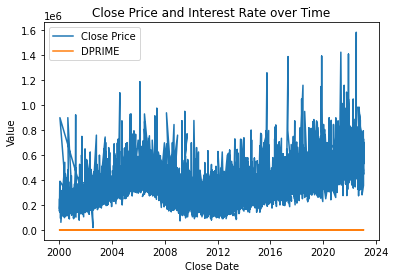

In [13]:
#Plotting Close Price and interest rate (DPRIME) over time (Close Date)
plt.plot(df['Close Date'], df['Close Price'], label='Close Price')
plt.plot(df['Close Date'], df['DPRIME'], label='DPRIME')
plt.xlabel('Close Date')
plt.ylabel('Value')
plt.title('Close Price and Interest Rate over Time')
plt.legend()
plt.show()

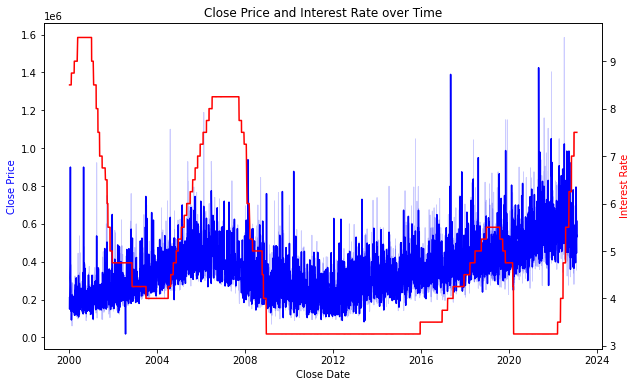

In [14]:
#Let's see if plotting with Close Price and Interest rates on separate y-axis helps visualize possible relationship.

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot Close Price on ax1
sns.lineplot(x='Close Date', y='Close Price', data=df, ax=ax1, color='b')
ax1.set_ylabel('Close Price', color='b')

# Plot Interest Rate on ax2
sns.lineplot(x='Close Date', y='DPRIME', data=df, ax=ax2, color='r')
ax2.set_ylabel('Interest Rate', color='r')

# Customize the plot
ax1.set_xlabel('Close Date')
ax1.set_title('Close Price and Interest Rate over Time')

plt.show()

I wonder if looking at monthly sales volume would be helpful.

In [15]:
# Group data by month and calculate the count of units sold
monthly_sales = df.groupby(df['Close Date'].dt.to_period('M'))['Close Price'].count()

# Reset index and rename columns
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'Units Sold']

# Print the resulting DataFrame
print(monthly_sales)
print(monthly_sales.columns)


       Month  Units Sold
0    2000-01          10
1    2000-02          24
2    2000-03          29
3    2000-04          29
4    2000-05          26
..       ...         ...
272  2022-09          16
273  2022-10          20
274  2022-11          18
275  2022-12          22
276  2023-01          16

[277 rows x 2 columns]
Index(['Month', 'Units Sold'], dtype='object')


In [16]:
#Group data by month and calculate the average interest rate (DPRIME)
monthly_avg_dprime = df.groupby(df['Close Date'].dt.to_period('M'))['DPRIME'].mean()

# Reset index and rename columns
monthly_avg_dprime = monthly_avg_dprime.reset_index()
monthly_avg_dprime.columns = ['Month', 'Avg DPRIME']

# Print the resulting DataFrame
print(monthly_avg_dprime)
print(monthly_avg_dprime.columns)

       Month  Avg DPRIME
0    2000-01    8.500000
1    2000-02    8.750000
2    2000-03    8.879310
3    2000-04    9.000000
4    2000-05    9.288462
..       ...         ...
272  2022-09    5.734375
273  2022-10    6.250000
274  2022-11    6.875000
275  2022-12    7.227273
276  2023-01    7.500000

[277 rows x 2 columns]
Index(['Month', 'Avg DPRIME'], dtype='object')


In [17]:
# Merge with 'Interest Rate' column
merged_df = pd.merge(monthly_sales, monthly_avg_dprime, on='Month')

print(merged_df)


       Month  Units Sold  Avg DPRIME
0    2000-01          10    8.500000
1    2000-02          24    8.750000
2    2000-03          29    8.879310
3    2000-04          29    9.000000
4    2000-05          26    9.288462
..       ...         ...         ...
272  2022-09          16    5.734375
273  2022-10          20    6.250000
274  2022-11          18    6.875000
275  2022-12          22    7.227273
276  2023-01          16    7.500000

[277 rows x 3 columns]


In [18]:
merged_df.head()

,Month,Units Sold,Avg DPRIME
0,2000-01,10,8.500000
1,2000-02,24,8.750000
2,2000-03,29,8.879310
3,2000-04,29,9.000000
4,2000-05,26,9.288462


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 276
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Month       277 non-null    period[M]
 1   Units Sold  277 non-null    int64    
 2   Avg DPRIME  277 non-null    float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 8.7 KB


In [20]:
merged_df.describe()

,Units Sold,Avg DPRIME
count,277.000000,277.000000
mean,28.357401,4.735052
std,8.420045,1.825923
min,8.000000,3.250000
25%,22.000000,3.250000
50%,29.000000,4.000000
75%,34.000000,5.500000
max,50.000000,9.500000


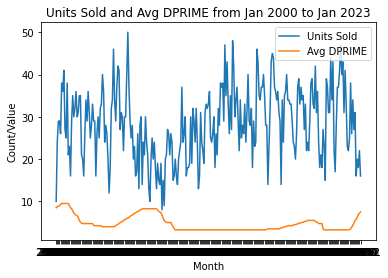

In [21]:
# Convert 'Month' column to string representation
merged_df['Month'] = merged_df['Month'].astype(str)

# Create a line plot
plt.plot(merged_df['Month'], merged_df['Units Sold'], label='Units Sold')
plt.plot(merged_df['Month'], merged_df['Avg DPRIME'], label='Avg DPRIME')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count/Value')
plt.title('Units Sold and Avg DPRIME from Jan 2000 to Jan 2023')
plt.legend()

# Display the plot
plt.show()

Eventhough scale of this chart makes it difficult to evaluate, it does seem that there's a dip in sales volume (monthly units sold) when the interest rate (daily prime) is high. Let's try a chart with twin y-axis to help with scale. It'll be helpful to add vertical markers for each year as well.

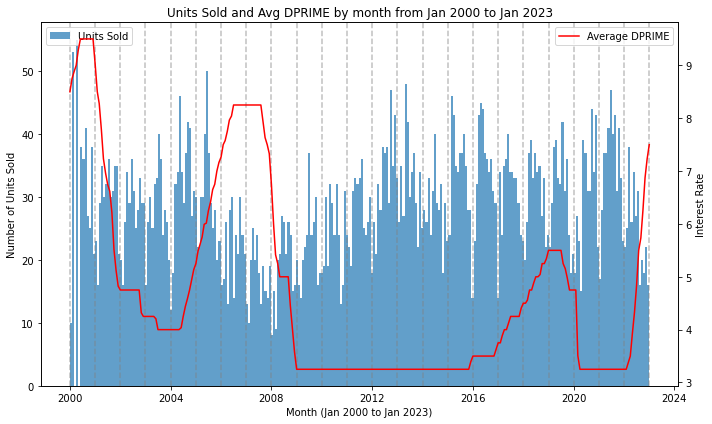

In [22]:
# Convert 'Month' column to datetime format
merged_df['Month'] = pd.to_datetime(merged_df['Month'])

# Create subplots and set up twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Create histogram of units sold
ax1.hist(merged_df['Month'], bins=len(merged_df['Month'].unique()), weights=merged_df['Units Sold'], alpha=0.7, label='Units Sold')
ax1.set_xlabel('Month (Jan 2000 to Jan 2023)')
ax1.set_ylabel('Number of Units Sold')
ax1.set_title('Units Sold and Avg DPRIME by month from Jan 2000 to Jan 2023')

# Create line plot of interest rate
ax2.plot(merged_df['Month'], merged_df['Avg DPRIME'], color='r', label='Average DPRIME')
ax2.set_ylabel('Interest Rate')

# Add vertical lines for each year
years = merged_df['Month'].dt.year.unique()
for year in years:
    ax1.axvline(pd.to_datetime(str(year)), color='gray', linestyle='--', alpha=0.5)

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to prevent overlapping labels
fig.tight_layout()

# Display the plot
plt.show()

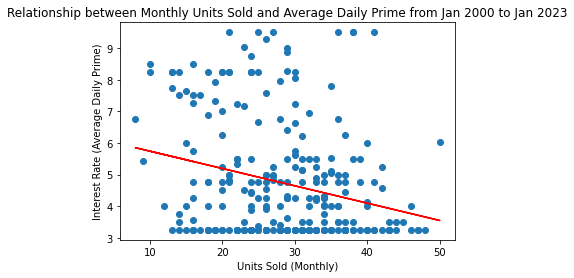

In [23]:
# Create a scatter plot
plt.scatter(merged_df['Units Sold'], merged_df['Avg DPRIME'])  
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Interest Rate (Average Daily Prime)')
plt.title('Relationship between Monthly Units Sold and Average Daily Prime from Jan 2000 to Jan 2023')

# Add regression line
slope, intercept = np.polyfit(merged_df['Units Sold'], merged_df['Avg DPRIME'], 1)
plt.plot(merged_df['Units Sold'], slope * merged_df['Units Sold'] + intercept, color='red')

# Display the plot
plt.show()

This scatter plot makes it very clear that sales volume goes up when interest rates go down. Let's see how sales volume relates to sales prices (original, list and close prices).

In [24]:
#Recall monthly_sales is the number of units sold each month from Jan 2000 to Jan 2023
print(monthly_sales)

       Month  Units Sold
0    2000-01          10
1    2000-02          24
2    2000-03          29
3    2000-04          29
4    2000-05          26
..       ...         ...
272  2022-09          16
273  2022-10          20
274  2022-11          18
275  2022-12          22
276  2023-01          16

[277 rows x 2 columns]


In [25]:
#Computing Average Sales Prices (Original, List, and Close)
monthly_avg_original = df.groupby(df['Close Date'].dt.to_period('M'))['Original Price'].mean()
monthly_avg_list = df.groupby(df['Close Date'].dt.to_period('M'))['List Price'].mean()
monthly_avg_close = df.groupby(df['Close Date'].dt.to_period('M'))['Close Price'].mean()

# Reset index and rename columns
monthly_avg_original = monthly_avg_original.reset_index()
monthly_avg_original.columns = ['Month', 'Avg Original Price']

monthly_avg_list = monthly_avg_list.reset_index()
monthly_avg_list.columns = ['Month', 'Avg List Price']

monthly_avg_close = monthly_avg_close.reset_index()
monthly_avg_close.columns = ['Month', 'Avg Close Price']

print(monthly_avg_original)
print(monthly_avg_list)
print(monthly_avg_close)

       Month  Avg Original Price
0    2000-01       326375.000000
1    2000-02       195760.416667
2    2000-03       171273.344828
3    2000-04       190837.896552
4    2000-05       193134.230769
..       ...                 ...
272  2022-09       609966.687500
273  2022-10       649027.450000
274  2022-11       534197.500000
275  2022-12       547254.500000
276  2023-01       607356.250000

[277 rows x 2 columns]
       Month  Avg List Price
0    2000-01   318135.000000
1    2000-02   194027.083333
2    2000-03   170411.275862
3    2000-04   189110.310345
4    2000-05   192153.461538
..       ...             ...
272  2022-09   582787.500000
273  2022-10   613729.950000
274  2022-11   514419.444444
275  2022-12   531840.863636
276  2023-01   577931.250000

[277 rows x 2 columns]
       Month  Avg Close Price
0    2000-01    307735.000000
1    2000-02    188922.916667
2    2000-03    168384.482759
3    2000-04    186610.344828
4    2000-05    188580.000000
..       ...              ..

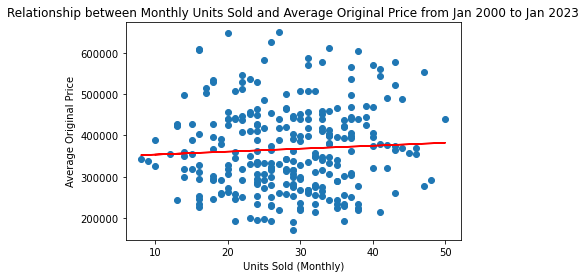

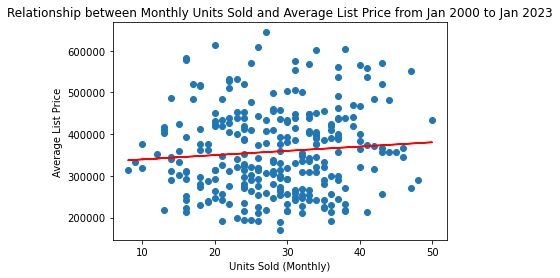

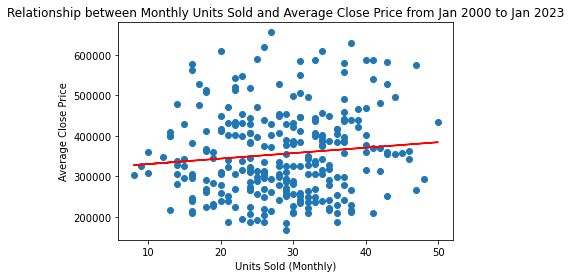

In [26]:
# Create scatter plots comparing average prices to sales volume (units sold).
plt.scatter(merged_df['Units Sold'],monthly_avg_original['Avg Original Price'])
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Original Price')
plt.title('Relationship between Monthly Units Sold and Average Original Price from Jan 2000 to Jan 2023')

# Add regression line
slope, intercept = np.polyfit(merged_df['Units Sold'], monthly_avg_original['Avg Original Price'], 1)
plt.plot(merged_df['Units Sold'], slope * merged_df['Units Sold'] + intercept, color='red')



# Display the plot
plt.show()

plt.scatter(merged_df['Units Sold'],monthly_avg_list['Avg List Price'])
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average List Price')
plt.title('Relationship between Monthly Units Sold and Average List Price from Jan 2000 to Jan 2023')

# Add regression line
slope, intercept = np.polyfit(merged_df['Units Sold'], monthly_avg_list['Avg List Price'], 1)
plt.plot(merged_df['Units Sold'], slope * merged_df['Units Sold'] + intercept, color='red')

# Display the plot
plt.show()

plt.scatter(merged_df['Units Sold'],monthly_avg_close['Avg Close Price'])
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Close Price')
plt.title('Relationship between Monthly Units Sold and Average Close Price from Jan 2000 to Jan 2023')

# Add regression line
slope, intercept = np.polyfit(merged_df['Units Sold'], monthly_avg_close['Avg Close Price'], 1)
plt.plot(merged_df['Units Sold'], slope * merged_df['Units Sold'] + intercept, color='red')

# Display the plot
plt.show()

There's a slightly positive relationship between sales volume (units sold) and prices. I wonder if it might be helpful to include measure of time as part of our evaluation.

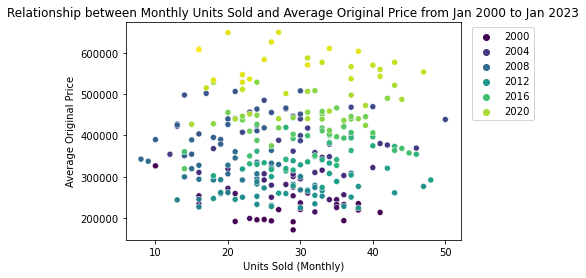

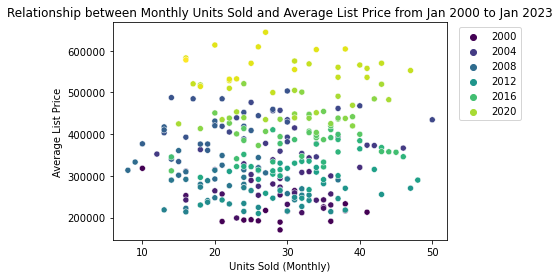

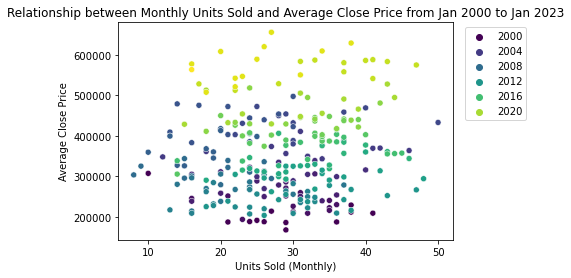

In [27]:
# Extract the year from the 'Month' column
merged_df['Year'] = merged_df['Month'].dt.year

# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=monthly_avg_original['Avg Original Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Original Price')
plt.title('Relationship between Monthly Units Sold and Average Original Price from Jan 2000 to Jan 2023')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=monthly_avg_list['Avg List Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average List Price')
plt.title('Relationship between Monthly Units Sold and Average List Price from Jan 2000 to Jan 2023')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=monthly_avg_close['Avg Close Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Close Price')
plt.title('Relationship between Monthly Units Sold and Average Close Price from Jan 2000 to Jan 2023')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

Wow, I'm glad we added time to our exploration. It looks like part of what we're seeing here is due to inflation. By adjusting prices for inflation, we can gain a more accurate understanding of the relationship between prices and volume (units sold) over time, taking into account the impact of changing consumer purchasing power.

In [28]:
# Read the US_Bureau_of_Labor_Statistics_CPI_for_All_Urban_Consumers_CPI_U_2000_to_2023.csv file into a dataframe
cpi_data = pd.read_csv('US_Bureau_of_Labor_Statistics_CPI_for_All_Urban_Consumers_CPI_U_2000_to_2023.csv')

In [29]:
cpi_data.head()

,Year,Period (Month),Value
0,2000,M13,172.2
1,2001,M13,177.1
2,2002,M13,179.9
3,2003,M13,184.0
4,2004,M13,188.9


In [30]:
print(cpi_data)

    Year Period (Month)    Value
0   2000            M13  172.200
1   2001            M13  177.100
2   2002            M13  179.900
3   2003            M13  184.000
4   2004            M13  188.900
5   2005            M13  195.300
6   2006            M13  201.600
7   2007            M13  207.342
8   2008            M13  215.303
9   2009            M13  214.537
10  2010            M13  218.056
11  2011            M13  224.939
12  2012            M13  229.594
13  2013            M13  232.957
14  2014            M13  236.736
15  2015            M13  237.017
16  2016            M13  240.007
17  2017            M13  245.120
18  2018            M13  251.107
19  2019            M13  255.657
20  2020            M13  258.811
21  2021            M13  270.970
22  2022            M13  292.655
23  2023             M1  299.170


In [31]:
# Calculate the inflation adjustment factor for each year based on the CPI data

# Select the baseline year and its corresponding CPI value
baseline_year = 2000
baseline_cpi = 172.200

# Define a custom function to calculate the inflation adjustment factor
def calculate_inflation_adjustment_factor(close_date):
    year = close_date.year
    cpi = cpi_data.loc[cpi_data['Year'] == year, 'Value'].item()
    return cpi / baseline_cpi

# Add a new column 'Inflation Factor' to the DataFrame
df['Inflation Factor'] = df['Close Date'].apply(calculate_inflation_adjustment_factor)

# Print the updated DataFrame
print(df)

                    APN  Address - Street Number Address - Street Name  \
0     236-0243-003-0000                     6248           Saint James   
1     292-0500-070-0000                     1057            Harrington   
2     260-0410-014-0000                     3930                 Cyrus   
3     283-0151-025-0000                     2124        Gunn (Priv Ln)   
4     273-0112-028-0000                     3005    California-priv.Ln   
...                 ...                      ...                   ...   
7850  272-0260-008-0000                     2640              CARDINAL   
7851  230-0424-001-0000                     4907              Marietta   
7852  256-0284-033-0000                     4755               Gibbons   
7853  273-0122-033-0000                     6310              Eastmont   
7854  230-0402-005-0000                     4139                Pueblo   

     Address - Zip Code  Bedrooms  Bathrooms  MTRO Square Footage  \
0                 95608         4         

In [32]:
df.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME,Inflation Factor
0,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08,9.0,1.0
1,292-0500-070-0000,1057,Harrington,95608,3,2,1832,0.21,1984,0,10,285000,285000,278000,2000-05-08,9.0,1.0
2,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05,9.5,1.0
3,283-0151-025-0000,2124,Gunn (Priv Ln),95608,4,2,1994,0.17,1991,0,80,229000,219900,217000,2000-07-05,9.5,1.0
4,273-0112-028-0000,3005,California-priv.Ln,95608,3,2,1451,0.23,1980,0,46,182500,179000,174000,2000-07-05,9.5,1.0


In [33]:
#Calculate Adjusted Prices (Original, List and Close) using the inflation factor

df['Adjusted Original Price'] = df['Original Price'] / df['Inflation Factor']
df['Adjusted List Price'] = df['List Price'] / df['Inflation Factor']
df['Adjusted Close Price'] = df['Close Price'] / df['Inflation Factor']

df_adjusted_prices = df
print(df_adjusted_prices)

                    APN  Address - Street Number Address - Street Name  \
0     236-0243-003-0000                     6248           Saint James   
1     292-0500-070-0000                     1057            Harrington   
2     260-0410-014-0000                     3930                 Cyrus   
3     283-0151-025-0000                     2124        Gunn (Priv Ln)   
4     273-0112-028-0000                     3005    California-priv.Ln   
...                 ...                      ...                   ...   
7850  272-0260-008-0000                     2640              CARDINAL   
7851  230-0424-001-0000                     4907              Marietta   
7852  256-0284-033-0000                     4755               Gibbons   
7853  273-0122-033-0000                     6310              Eastmont   
7854  230-0402-005-0000                     4139                Pueblo   

     Address - Zip Code  Bedrooms  Bathrooms  MTRO Square Footage  \
0                 95608         4         

In [34]:
df_adjusted_prices.head()

,APN,Address - Street Number,Address - Street Name,Address - Zip Code,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,DOM,CDOM,Original Price,List Price,Close Price,Close Date,DPRIME,Inflation Factor,Adjusted Original Price,Adjusted List Price,Adjusted Close Price
0,236-0243-003-0000,6248,Saint James,95608,4,3,2123,0.21,1962,0,28,239500,239500,235000,2000-05-08,9.0,1.0,239500.0,239500.0,235000.0
1,292-0500-070-0000,1057,Harrington,95608,3,2,1832,0.21,1984,0,10,285000,285000,278000,2000-05-08,9.0,1.0,285000.0,285000.0,278000.0
2,260-0410-014-0000,3930,Cyrus,95608,3,3,1480,0.19,1992,0,399,159000,159000,157500,2000-07-05,9.5,1.0,159000.0,159000.0,157500.0
3,283-0151-025-0000,2124,Gunn (Priv Ln),95608,4,2,1994,0.17,1991,0,80,229000,219900,217000,2000-07-05,9.5,1.0,229000.0,219900.0,217000.0
4,273-0112-028-0000,3005,California-priv.Ln,95608,3,2,1451,0.23,1980,0,46,182500,179000,174000,2000-07-05,9.5,1.0,182500.0,179000.0,174000.0


In [35]:
#USING ADJUSTED PRICES
#Computing Average Sales Prices (Original, List, and Close)
adjusted_monthly_avg_original = df_adjusted_prices.groupby(df_adjusted_prices['Close Date'].dt.to_period('M'))['Adjusted Original Price'].mean()
adjusted_monthly_avg_list = df_adjusted_prices.groupby(df_adjusted_prices['Close Date'].dt.to_period('M'))['Adjusted List Price'].mean()
adjusted_monthly_avg_close = df_adjusted_prices.groupby(df_adjusted_prices['Close Date'].dt.to_period('M'))['Adjusted Close Price'].mean()

# Reset index and rename columns
adjusted_monthly_avg_original = adjusted_monthly_avg_original.reset_index()
adjusted_monthly_avg_original.columns = ['Month', 'Avg Adjusted Original Price']

adjusted_monthly_avg_list = adjusted_monthly_avg_list.reset_index()
adjusted_monthly_avg_list.columns = ['Month', 'Avg Adjusted List Price']

adjusted_monthly_avg_close = adjusted_monthly_avg_close.reset_index()
adjusted_monthly_avg_close.columns = ['Month', 'Avg Adjusted Close Price']

print(adjusted_monthly_avg_original)
print(adjusted_monthly_avg_list)
print(adjusted_monthly_avg_close)

       Month  Avg Adjusted Original Price
0    2000-01                326375.000000
1    2000-02                195760.416667
2    2000-03                171273.344828
3    2000-04                190837.896552
4    2000-05                193134.230769
..       ...                          ...
272  2022-09                358908.146410
273  2022-10                381891.739044
274  2022-11                314325.090977
275  2022-12                322007.909996
276  2023-01                349589.685630

[277 rows x 2 columns]
       Month  Avg Adjusted List Price
0    2000-01            318135.000000
1    2000-02            194027.083333
2    2000-03            170411.275862
3    2000-04            189110.310345
4    2000-05            192153.461538
..       ...                      ...
272  2022-09            342915.745502
273  2022-10            361122.473185
274  2022-11            302687.561577
275  2022-12            312938.431662
276  2023-01            332652.877127

[277 rows x 2 c

In [36]:
merged_df.head()

,Month,Units Sold,Avg DPRIME,Year
0,2000-01-01,10,8.500000,2000
1,2000-02-01,24,8.750000,2000
2,2000-03-01,29,8.879310,2000
3,2000-04-01,29,9.000000,2000
4,2000-05-01,26,9.288462,2000


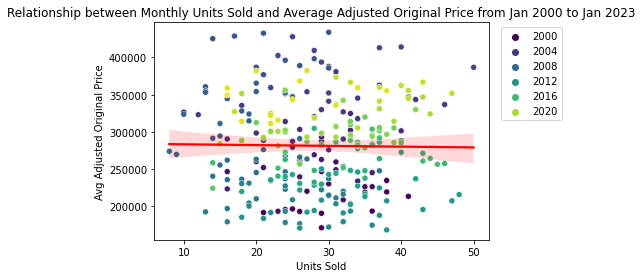

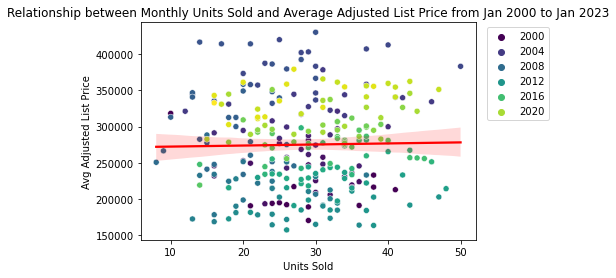

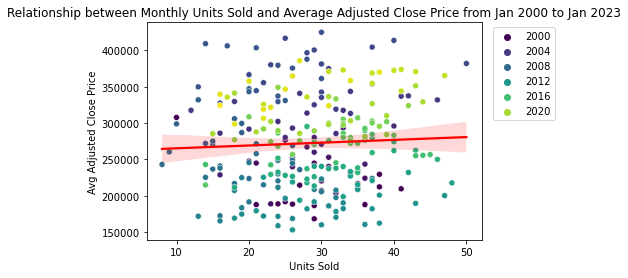

In [37]:
# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_original['Avg Adjusted Original Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Adjusted Original Price')
plt.title('Relationship between Monthly Units Sold and Average Adjusted Original Price from Jan 2000 to Jan 2023')

# Add a regression line to the scatter plot
sns.regplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_original['Avg Adjusted Original Price'], scatter=False, color='red')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_list['Avg Adjusted List Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Adjusted List Price')
plt.title('Relationship between Monthly Units Sold and Average Adjusted List Price from Jan 2000 to Jan 2023')

# Add a regression line to the scatter plot
sns.regplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_list['Avg Adjusted List Price'], scatter=False, color='red')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

# Create a scatter plot with color-coded dots
sns.scatterplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_close['Avg Adjusted Close Price'], hue='Year', palette='viridis')
plt.xlabel('Units Sold (Monthly)')
plt.ylabel('Average Adjusted Close Price')
plt.title('Relationship between Monthly Units Sold and Average Adjusted Close Price from Jan 2000 to Jan 2023')

# Add a regression line to the scatter plot
sns.regplot(data=merged_df, x='Units Sold', y=adjusted_monthly_avg_close['Avg Adjusted Close Price'], scatter=False, color='red')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

This is very interesting. It doesn't seem like there is much of a relationship between price and volume which goes against everything I know about economics. 

In [38]:
merged_df.head()

,Month,Units Sold,Avg DPRIME,Year
0,2000-01-01,10,8.500000,2000
1,2000-02-01,24,8.750000,2000
2,2000-03-01,29,8.879310,2000
3,2000-04-01,29,9.000000,2000
4,2000-05-01,26,9.288462,2000


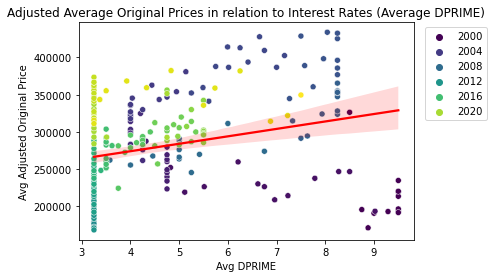

In [39]:
# Create a scatter plot to see if there is a relationship between Adjusted prices and interest rates (Average DPRIME)
sns.scatterplot(data=merged_df, x='Avg DPRIME', y=adjusted_monthly_avg_original['Avg Adjusted Original Price'], hue='Year', palette='viridis')
plt.xlabel('Interest Rate (Average DPRIME)')
plt.ylabel('Adjusted Averge Original Price')
plt.title('Adjusted Average Original Prices in relation to Interest Rates (Average DPRIME)')

# Add a regression line to the scatter plot
sns.regplot(data=merged_df, x='Avg DPRIME', y=adjusted_monthly_avg_original['Avg Adjusted Original Price'], scatter=False, color='red')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

There's definitely something going on here. Let's see if a heatmap could help us determine which variables are most related to one another.

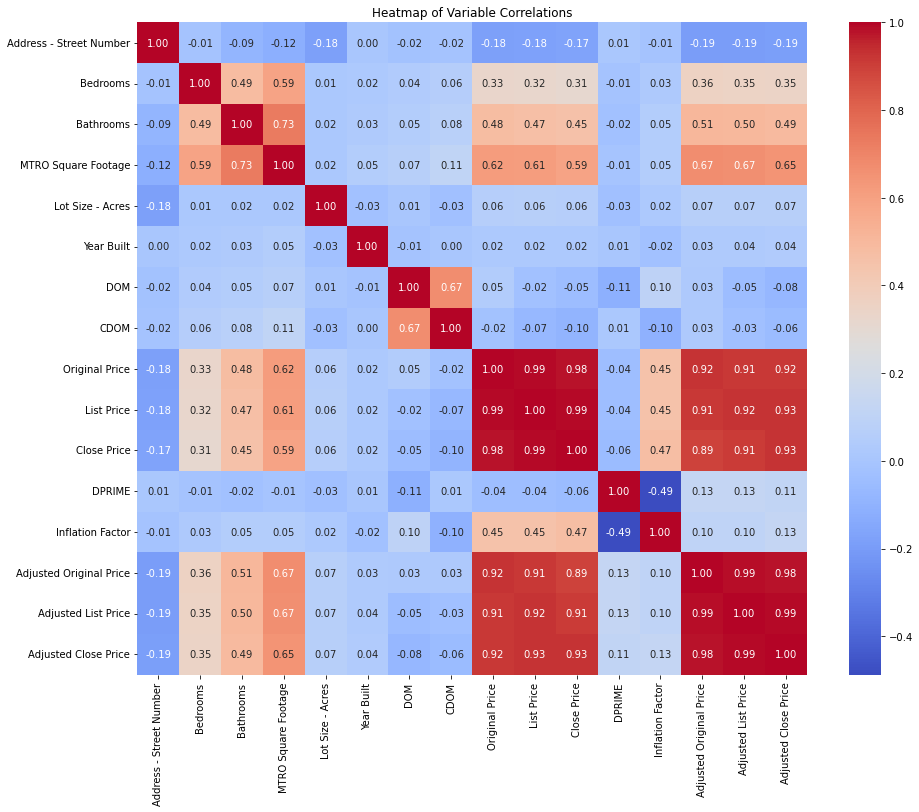

In [41]:
# Create a correlation matrix of the variables in 'df'
corr_matrix = df_adjusted_prices.corr()
plt.figure(figsize=(15, 12))

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Variable Correlations')

# Display the plot
plt.show()

Well I'm really not sure where to go from here. I thought with 20 years of data, I would be able to see empirical evidence of a fundamental economic rule that asserts interest rates (the price of money) and inflation (rising costs of goods) are inversely related. While I see that DPRIME and the Inflation Factor are in fact inversely related on the heatmap, I'm seeing no such relationship between interest rates and actual prices. This surpises me. As a realtor, we often explain consumer demand in response to interest rates as being inversely related.

I'll plan on discussing this further with my mentor to see if he has suggestions for other ways to analyze the data. In the meantime, it looks like the variables most correlated to residential real estate prices are bedrooms, bathrooms and square footage.